TASK 1 : STOCK MARKET PREDICTION.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [1]:
pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [5]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')

In [8]:
data = data.dropna()

In [9]:
trainData = data.iloc[:,4:5].values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [11]:
sc = MinMaxScaler(feature_range=(0,1))

In [12]:
trainData = sc.fit_transform(trainData)

In [13]:
trainData.shape

(1149, 1)

In [14]:
X_train = []

In [15]:
Y_train = []

In [16]:
for i in range (60,1149):
    X_train.append(trainData[i-60:i,0])
    Y_train.append(trainData[i,0])

In [17]:
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [18]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [19]:
model = Sequential()

In [20]:
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

In [21]:
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

In [22]:
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

In [23]:
model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

In [24]:
model.add(Dense(units =1))

In [25]:
model.compile(optimizer='adam',loss="mean_squared_error")

In [26]:
hist = model.fit(X_train, Y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 35s - loss: 0.0457 - 35s/epoch - 998ms/step
Epoch 2/20
35/35 - 16s - loss: 0.0129 - 16s/epoch - 470ms/step
Epoch 3/20
35/35 - 17s - loss: 0.0135 - 17s/epoch - 488ms/step
Epoch 4/20
35/35 - 16s - loss: 0.0100 - 16s/epoch - 447ms/step
Epoch 5/20
35/35 - 15s - loss: 0.0107 - 15s/epoch - 428ms/step
Epoch 6/20
35/35 - 15s - loss: 0.0075 - 15s/epoch - 425ms/step
Epoch 7/20
35/35 - 15s - loss: 0.0075 - 15s/epoch - 427ms/step
Epoch 8/20
35/35 - 15s - loss: 0.0064 - 15s/epoch - 424ms/step
Epoch 9/20
35/35 - 15s - loss: 0.0066 - 15s/epoch - 426ms/step
Epoch 10/20
35/35 - 15s - loss: 0.0070 - 15s/epoch - 426ms/step
Epoch 11/20
35/35 - 15s - loss: 0.0061 - 15s/epoch - 426ms/step
Epoch 12/20
35/35 - 15s - loss: 0.0067 - 15s/epoch - 431ms/step
Epoch 13/20
35/35 - 16s - loss: 0.0063 - 16s/epoch - 447ms/step
Epoch 14/20
35/35 - 19s - loss: 0.0070 - 19s/epoch - 553ms/step
Epoch 15/20
35/35 - 15s - loss: 0.0061 - 15s/epoch - 431ms/step
Epoch 16/20
35/35 - 15s - loss: 0.0053 - 15s/epoc

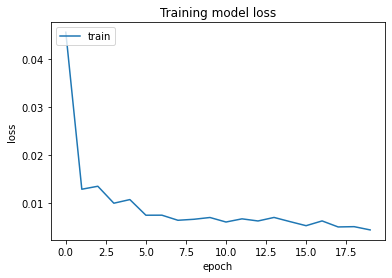

In [27]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [28]:
testData = pd.read_csv('Google_test_data.csv')

In [29]:
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
Y_test = testData.iloc[60:,0:].values 

In [30]:
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)

In [31]:
inputClosing_scaled.shape
X_test = []

In [32]:
length = len(testData)
timestep = 60

In [33]:
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])

In [34]:
X_test = np.array(X_test)

In [35]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [36]:
X_test.shape

(192, 60, 1)

In [37]:
Y_pred = model.predict(X_test)
Y_pred

6/6 [==============================] - 5s 148ms/step


array([[1.2080772],
       [1.2121441],
       [1.2241799],
       [1.2420322],
       [1.2574534],
       [1.2601255],
       [1.2491573],
       [1.2314954],
       [1.2183472],
       [1.2131988],
       [1.2060779],
       [1.1952349],
       [1.1851405],
       [1.1757394],
       [1.1729648],
       [1.1768504],
       [1.1939102],
       [1.2219888],
       [1.2553297],
       [1.2893028],
       [1.3061007],
       [1.3059846],
       [1.2874503],
       [1.2579275],
       [1.229143 ],
       [1.2105824],
       [1.2039595],
       [1.2024118],
       [1.1962048],
       [1.1864208],
       [1.1749536],
       [1.161514 ],
       [1.1416147],
       [1.11664  ],
       [1.1043864],
       [1.111101 ],
       [1.1315924],
       [1.1572188],
       [1.182817 ],
       [1.1980141],
       [1.2118514],
       [1.2272087],
       [1.244592 ],
       [1.2611288],
       [1.272967 ],
       [1.2756711],
       [1.2670406],
       [1.2576101],
       [1.2535464],
       [1.2575817],


In [38]:
predicted_price = sc.inverse_transform(Y_pred)

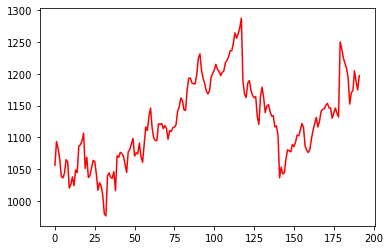

In [39]:
plt.plot(Y_test, color = 'red', label = 'Actual Stock Price')

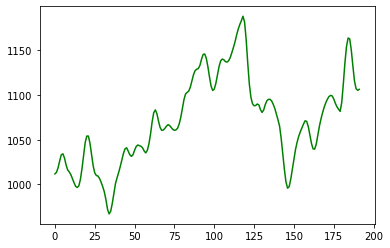

In [40]:
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')

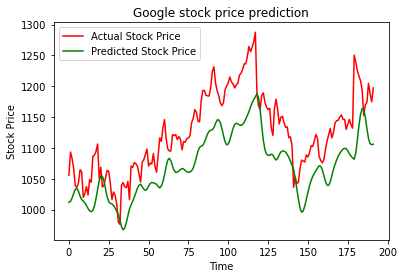

In [41]:
plt.plot(Y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()